In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

%matplotlib inline

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Practice 1
- 붓꽃 분류 문제에서 꽃받침의 길이와 폭을 사용하여 위와 같이 의사 결정 나무 모형을 만들고 정확도(accuracy) 기준으로 성능을 측정한다.
- K=5 인 교차 검증을 통해 테스트 성능 평균을 측정한다.
- max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수를 찾아라.

In [2]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

In [3]:
iris = load_iris()

In [4]:
X = iris.data[:,[0,1]]
y = iris.target

In [5]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

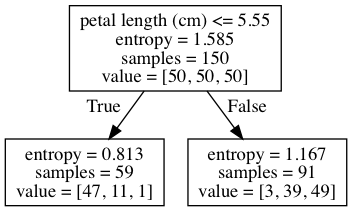

In [6]:
draw_decision_tree(tree1)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

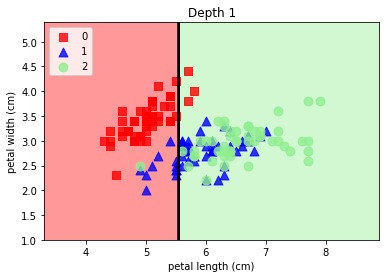

In [7]:
plot_decision_regions(X, y, tree1, "Depth 1")

In [8]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)

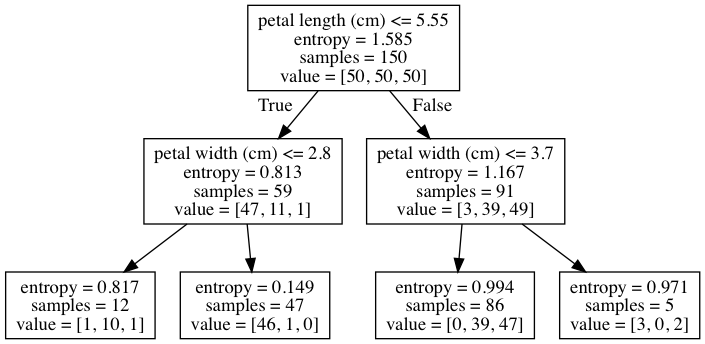

In [9]:
draw_decision_tree(tree2)

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

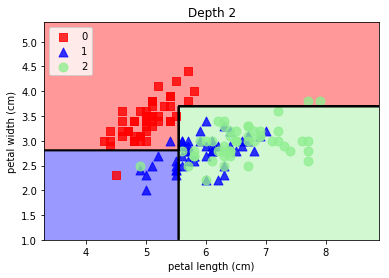

In [10]:
plot_decision_regions(X, y, tree2, "Depth 2")

In [11]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)

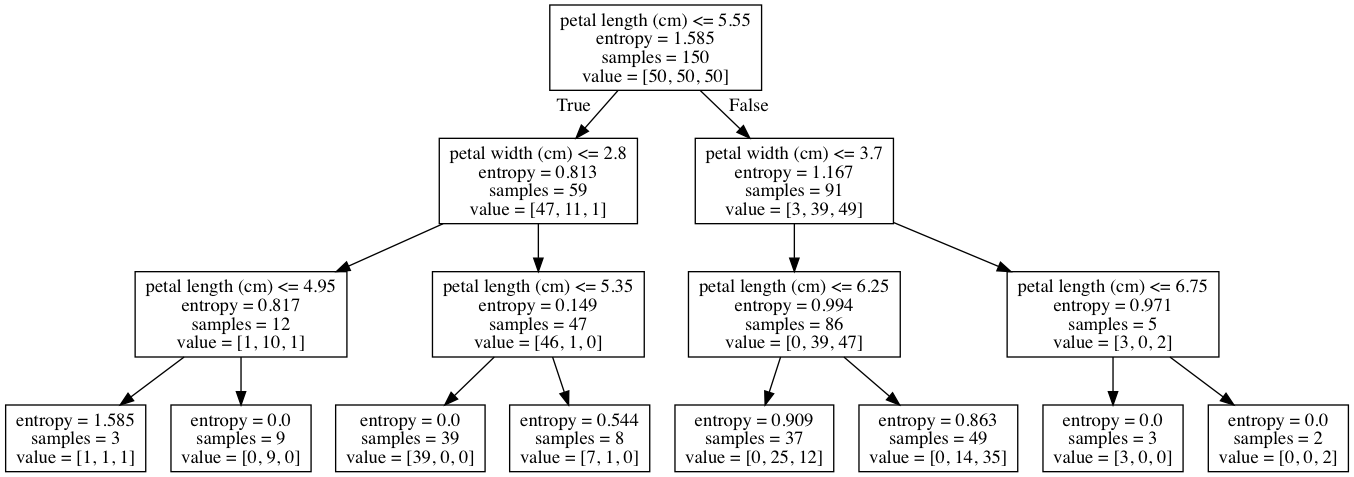

In [12]:
draw_decision_tree(tree3)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

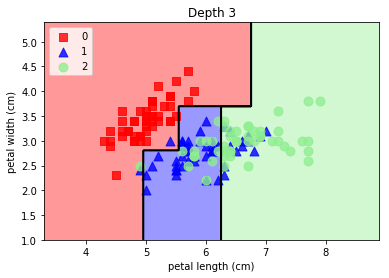

In [13]:
plot_decision_regions(X, y, tree3, "Depth 3")

In [14]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X, y)

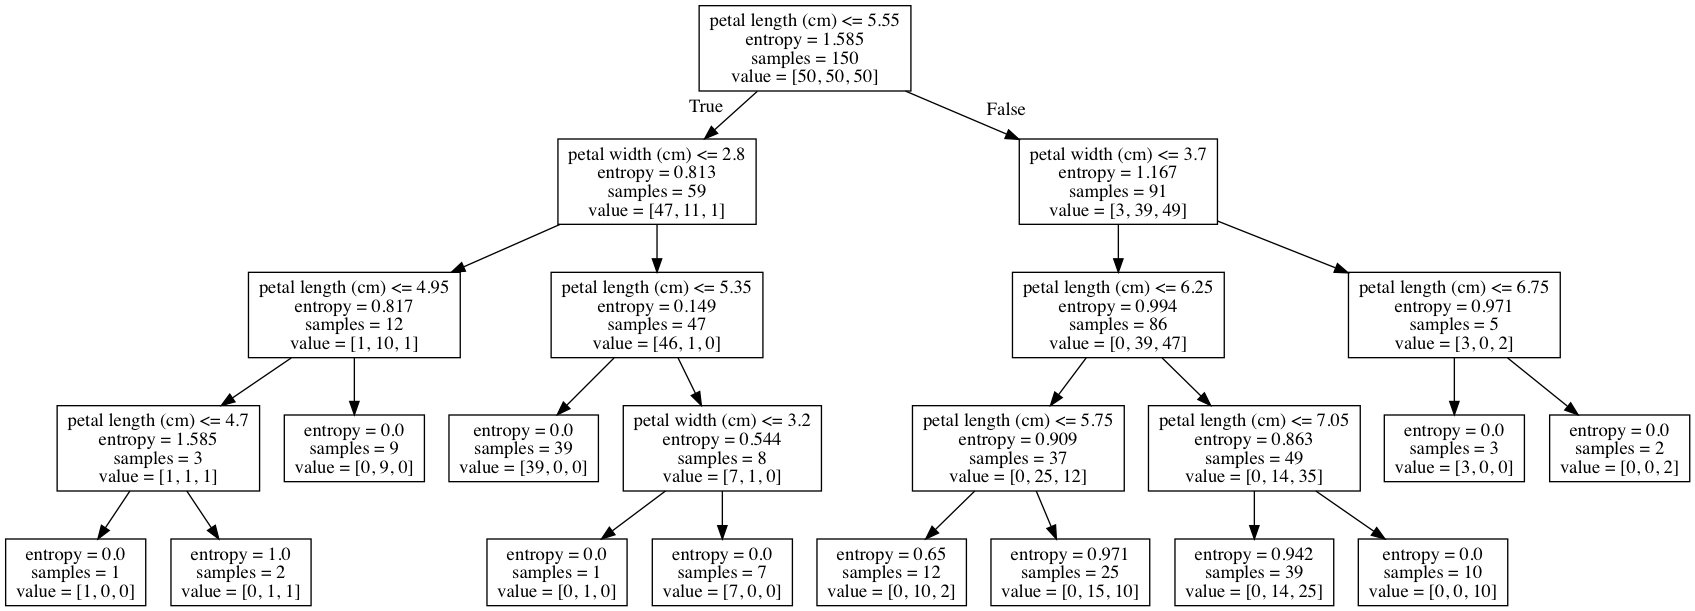

In [15]:
draw_decision_tree(tree4)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

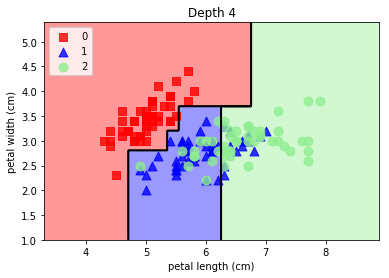

In [16]:
plot_decision_regions(X, y, tree4, "Depth 4")

In [17]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X, y)

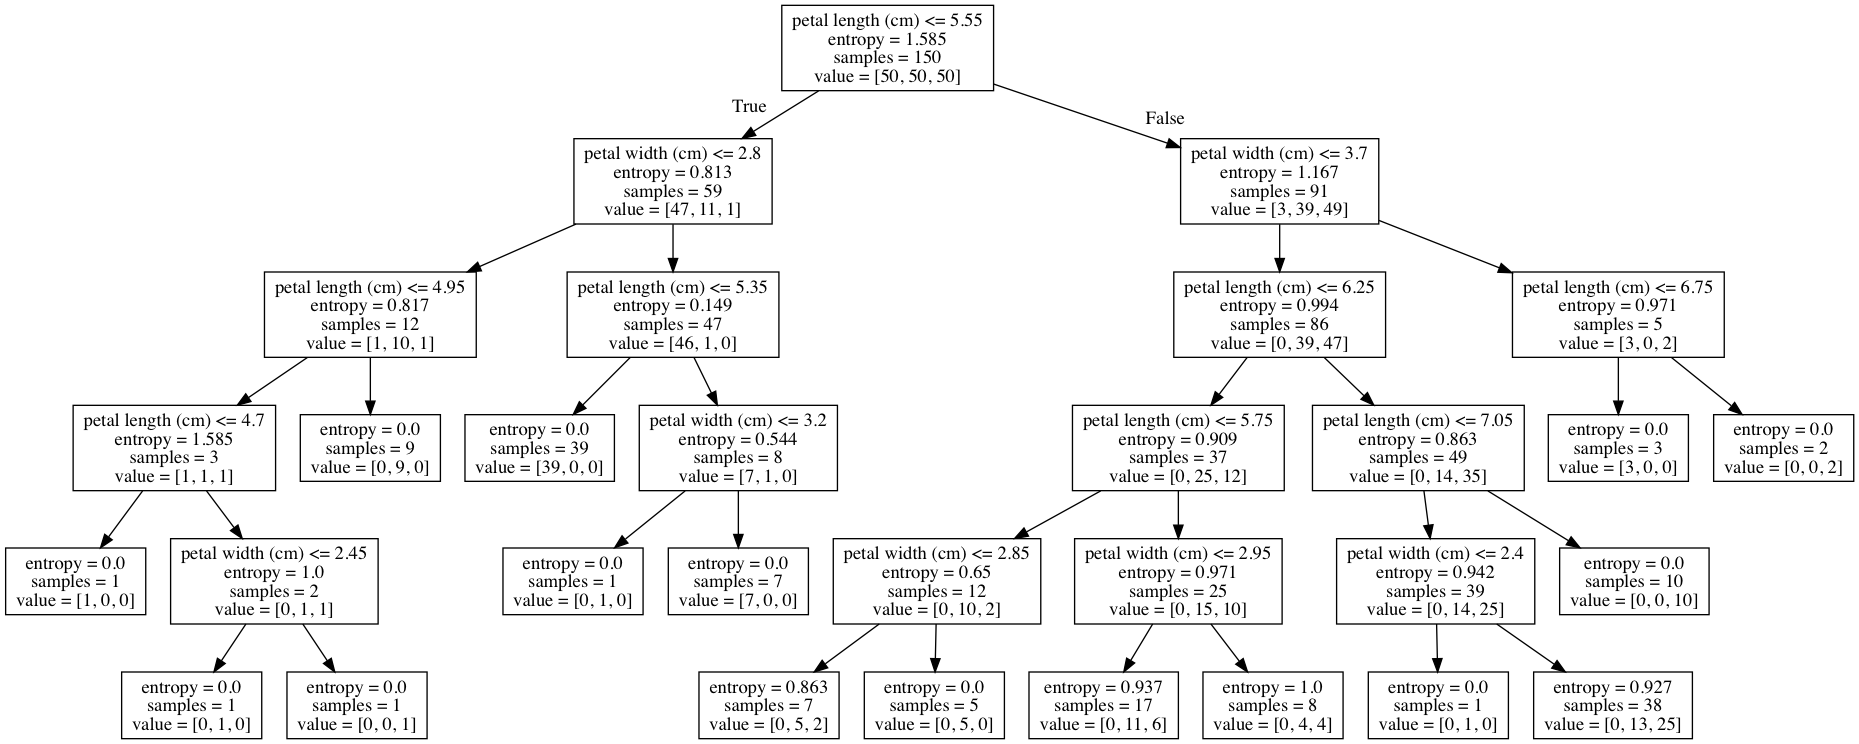

In [18]:
draw_decision_tree(tree5)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

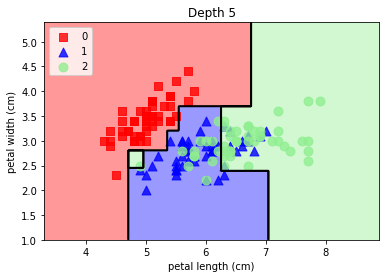

In [19]:
plot_decision_regions(X, y, tree5, "Depth 5")

In [20]:
tree6 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0).fit(X, y)

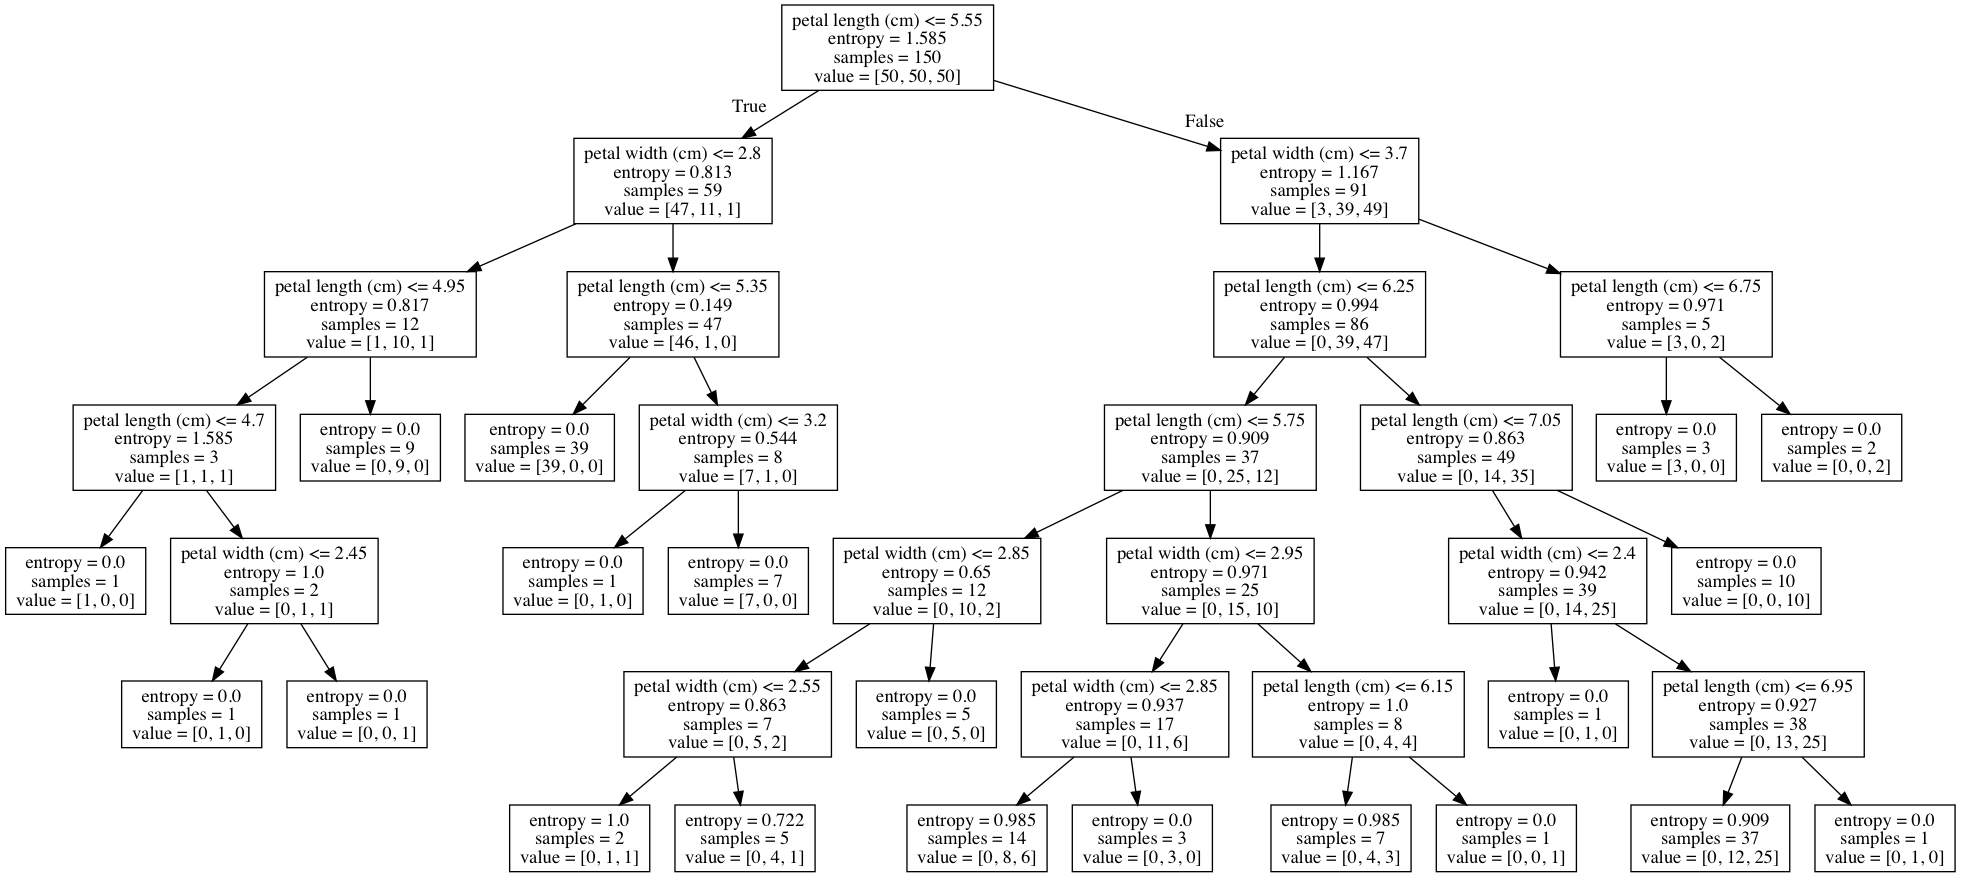

In [21]:
draw_decision_tree(tree6)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

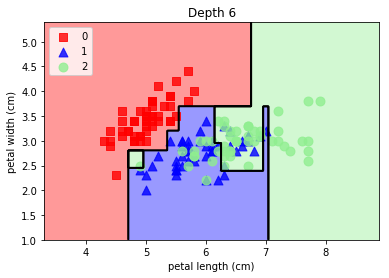

In [22]:
plot_decision_regions(X, y, tree6, "Depth 6")

In [23]:
tree7 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0).fit(X, y)

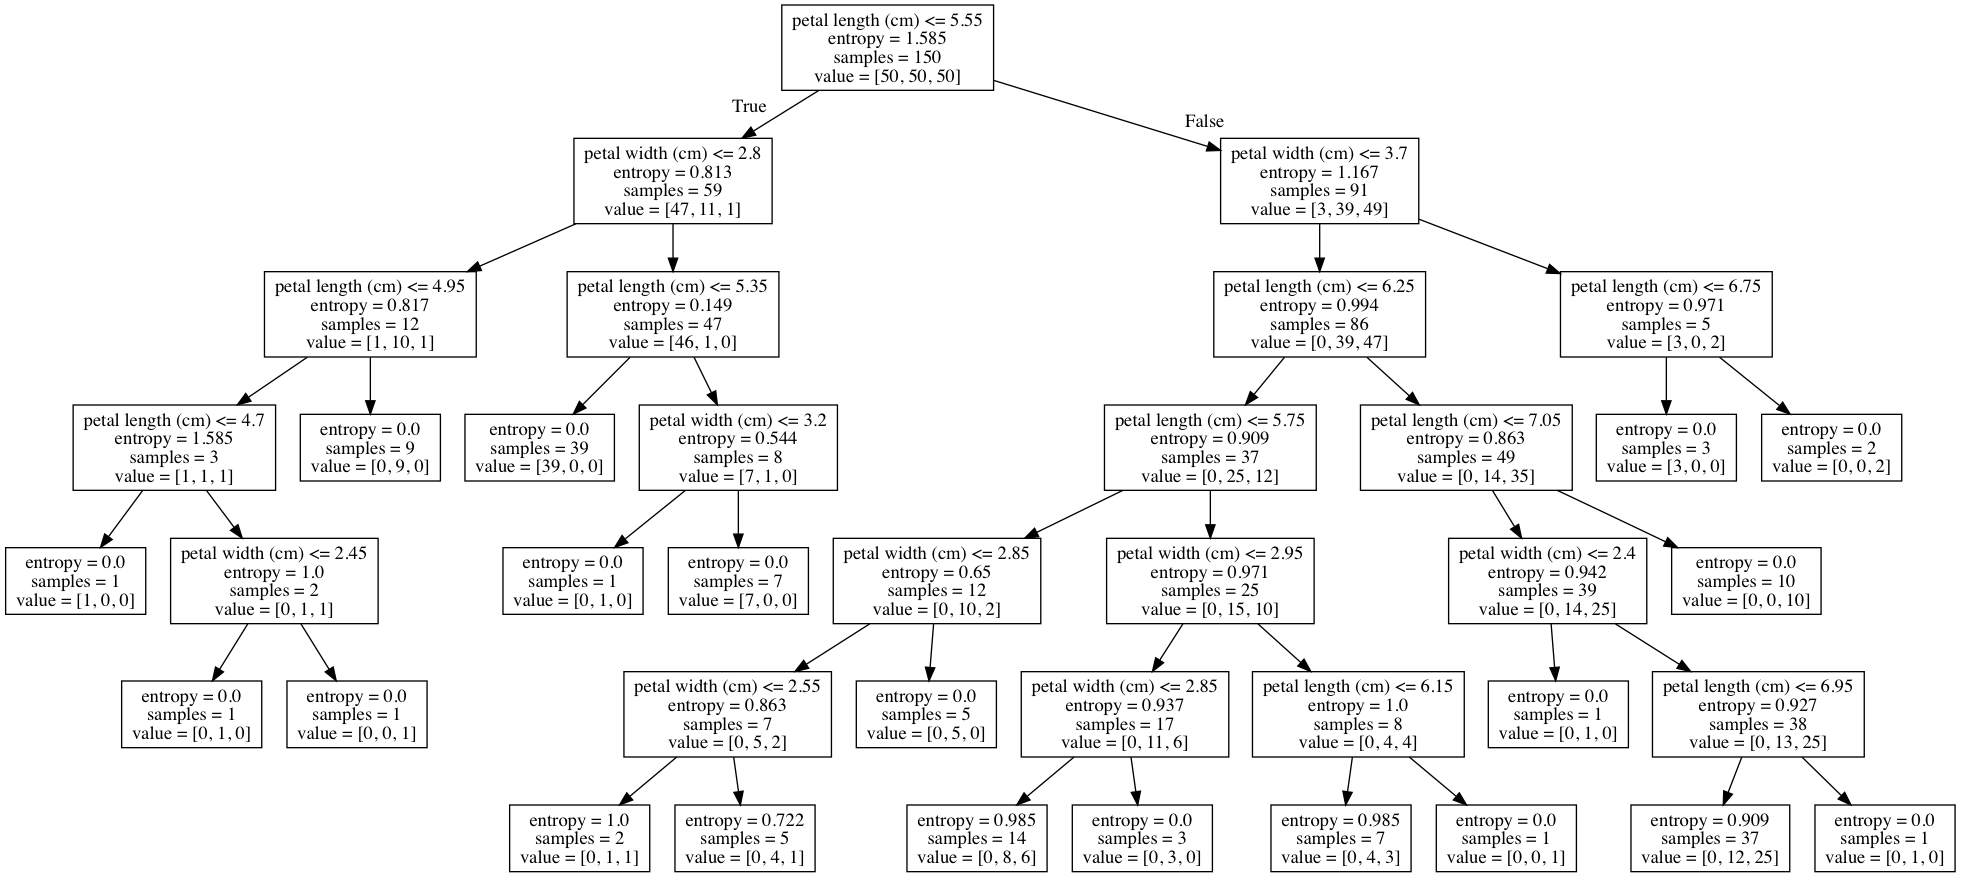

In [24]:
draw_decision_tree(tree7)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

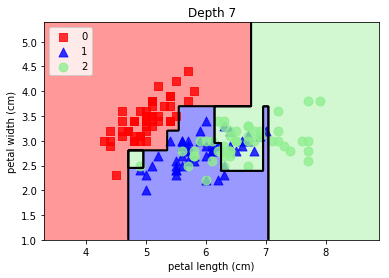

In [25]:
plot_decision_regions(X, y, tree7, "Depth 7")

In [26]:
score1 = np.mean(cross_val_score(tree1, X, y, cv=5))
score2 = np.mean(cross_val_score(tree2, X, y, cv=5))
score3 = np.mean(cross_val_score(tree3, X, y, cv=5))
score4 = np.mean(cross_val_score(tree4, X, y, cv=5))
score5 = np.mean(cross_val_score(tree5, X, y, cv=5))
score6 = np.mean(cross_val_score(tree6, X, y, cv=5))
score7 = np.mean(cross_val_score(tree7, X, y, cv=5))

In [27]:
score_list = [score1, score2, score3, score4, score5, score6, score7]
depth_list = [1, 2, 3, 4, 5, 6, 7]

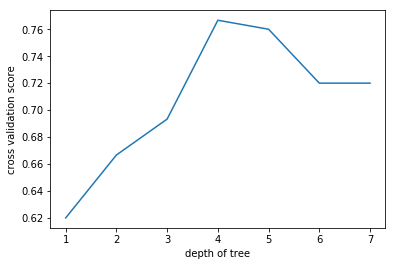

In [28]:
plt.xlabel("depth of tree")
plt.ylabel("cross validation score")

plt.plot(depth_list, score_list)

## Practice 2
- breast cancer 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
- 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 기준은 무엇인가?

In [29]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [30]:
breast_cancer = load_breast_cancer()

In [31]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [33]:
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
feature_list = list(breast_cancer.feature_names)
X_train = breast_cancer_df[feature_list]
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
y_train = breast_cancer.target

In [35]:
cancer = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0).fit(X_train, y_train)

### 'worst perimeter'의 feature_importance가 가장 높다.

In [36]:
importance_df = pd.DataFrame(cancer.feature_importances_, index=feature_list, columns=["importance"])
print(max(importance_df["importance"]))
importance_df.loc["worst perimeter"]

0.6858889407411874


importance    0.685889
Name: worst perimeter, dtype: float64

### max depth가 10 이상부터 성능의 변화가 거의 없다.

In [37]:
cancer1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X_train, y_train)
cancer2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X_train, y_train)
cancer3 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0).fit(X_train, y_train)
cancer4 = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=0).fit(X_train, y_train)
cancer5 = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0).fit(X_train, y_train)

In [38]:
score1 = np.mean(cross_val_score(cancer1, X_train, y_train, cv=5))
score2 = np.mean(cross_val_score(cancer2, X_train, y_train, cv=5))
score3 = np.mean(cross_val_score(cancer3, X_train, y_train, cv=5))
score4 = np.mean(cross_val_score(cancer4, X_train, y_train, cv=5))
score5 = np.mean(cross_val_score(cancer5, X_train, y_train, cv=5))

In [39]:
score_list = [score1, score2, score3, score4, score5]
depth_list = [1, 5, 10, 15, 20]

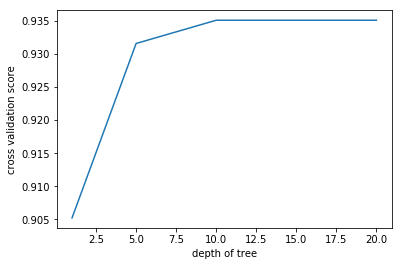

In [40]:
plt.xlabel("depth of tree")
plt.ylabel("cross validation score")

plt.plot(depth_list, score_list)

In [41]:
score3

0.9350981146594843

## Practice 3
- MINIST digit 이미지 분류 문제를 의사 결정 나무를 사용하여 풀어라. 
- K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
- 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 픽셀은 어디인가? 이 픽셀은 숫자들을 어떻게 구분하게 되며 왜 그렇게 구분지어지는지 생각하라.

In [42]:
from sklearn.datasets import load_digits

In [43]:
mnist = load_digits()

In [44]:
X_train = pd.DataFrame(mnist.data)

print(X_train.shape)
X_train.head() # 0~63 are pixcel numbers

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [45]:
y_train = mnist.target
y_train[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [46]:
mnist_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0).fit(X_train, y_train)

### 0~63의 픽셀중에서 42번 픽셀의 importance가 가장 높다.

In [47]:
mnist_importance = pd.DataFrame(mnist_model.feature_importances_, columns=["importance"])
print(max(mnist_importance["importance"]))
mnist_importance.loc[42]

0.13957955880916798


importance    0.13958
Name: 42, dtype: float64

### max depth가 10 이상부터 성능의 변화가 거의 없다.

In [48]:
mnist1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X_train, y_train)
mnist2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X_train, y_train)
mnist3 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0).fit(X_train, y_train)
mnist4 = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=0).fit(X_train, y_train)
mnist5 = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0).fit(X_train, y_train)

In [49]:
score1 = np.mean(cross_val_score(mnist1, X_train, y_train, cv=5))
score2 = np.mean(cross_val_score(mnist2, X_train, y_train, cv=5))
score3 = np.mean(cross_val_score(mnist3, X_train, y_train, cv=5))
score4 = np.mean(cross_val_score(mnist4, X_train, y_train, cv=5))
score5 = np.mean(cross_val_score(mnist5, X_train, y_train, cv=5))

In [50]:
score_list = [score1, score2, score3, score4, score5]
depth_list = [1, 5, 10, 15, 20]

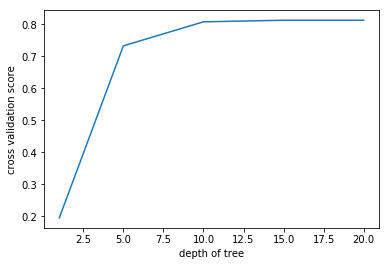

In [51]:
plt.xlabel("depth of tree")
plt.ylabel("cross validation score")

plt.plot(depth_list, score_list)